In [1]:
pip install gmaps

In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-45.08602030299257 64.63303285422614
76.7859817783607 157.04096171073968
47.89171248989405 48.809990146234895
6.731310323606465 138.66428819694715
40.140745585684186 -95.28817570610893
-1.9106038358781063 -99.15883761615407
59.25008170819015 -156.5363791496693
84.7667013663827 -47.22579709429684
-41.204965596354306 -101.3056975076333
74.69999849288405 -121.07729378965072
-35.72457770226964 86.00231750922524
-44.11440956264553 -83.74224683373214
-30.43333313453285 -99.04038311375456
56.668036745178114 -78.24605138453153
-37.05898680258947 174.94297603993624
32.14002070252732 -35.07689021483429
35.718477874027315 -120.20930146838325
58.402008692371 124.55803724117027
71.00839504449687 177.9263317029608
-5.040713936991295 113.95362221696206
27.358174254017044 -11.36700756811527
-55.71279130728327 135.19900654081238
-20.704520038576604 -104.74837562523025
-46.514055653952234 85.69185623447748
22.997039634445485 51.277860933524636
-68.6289972359331 2.2754201715436864
41.78830963190546 44.72

-70.6942107493505 31.435459199709385
11.135853596773558 -54.788179188004534
-75.20372970279256 -55.10126857307981
57.276788601227054 27.745079793381677
-62.98432224271618 0.9469608039137256
-83.05023365039746 -98.51675717062743
-58.805340981018894 34.28202479583942
50.869231386527645 40.24992624216998
29.13817352617403 -69.81612937483344
32.831644931247666 44.11035346028024
19.501677018014334 -98.00961243448612
88.6906788125747 -103.84145929230614
-64.1959219315635 130.05188605458346
-77.0428615926085 -147.59343447494388
60.14153049641084 108.53807556782704
-17.396501274156464 139.64724741930485
66.99581864164887 104.147197182546
-43.74286906442634 19.770406774795077
33.22317537790053 -67.51818684153793
80.52471579454752 -51.13311807895187
-54.58717368696067 -122.30561088546287
-34.539490017913096 65.7620825167391
31.93207060674969 178.89990346685556
-87.45685457798295 -24.812918805644927
86.02406393546929 140.11029899206983
43.726720216416425 138.71684328419002
69.10466421649156 -145.

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

641

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint-philippe
Processing Record 2 of Set 1 | cherskiy
Processing Record 3 of Set 1 | aksarayskiy
Processing Record 4 of Set 1 | airai
Processing Record 5 of Set 1 | maryville
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | kodiak
Processing Record 8 of Set 1 | upernavik
Processing Record 9 of Set 1 | ancud
Processing Record 10 of Set 1 | norman wells
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | castro
Processing Record 13 of Set 1 | lebu
Processing Record 14 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 15 of Set 1 | bombay
Processing Record 16 of Set 1 | ribeira grande
Processing Record 17 of Set 1 | avenal
Processing Record 18 of Set 1 | aldan
Processing Record 19 of Set 1 | leningradskiy
Processing Record 20 of Set 1 | banjarmasin
Processing Record 21 of Set 1 | arrecife
Processing Record 22 of Set 1 | new norfolk

Processing Record 36 of Set 4 | okato
Processing Record 37 of Set 4 | coquimbo
Processing Record 38 of Set 4 | codrington
Processing Record 39 of Set 4 | zasosna
Processing Record 40 of Set 4 | khatanga
Processing Record 41 of Set 4 | carira
Processing Record 42 of Set 4 | tiksi
Processing Record 43 of Set 4 | mutsu
Processing Record 44 of Set 4 | souillac
Processing Record 45 of Set 4 | bur gabo
City not found. Skipping...
Processing Record 46 of Set 4 | kalundborg
Processing Record 47 of Set 4 | omsukchan
Processing Record 48 of Set 4 | bluff
Processing Record 49 of Set 4 | yalutorovsk
Processing Record 50 of Set 4 | taolanaro
City not found. Skipping...
Processing Record 1 of Set 5 | salinas
Processing Record 2 of Set 5 | brae
Processing Record 3 of Set 5 | talnakh
Processing Record 4 of Set 5 | mudgee
Processing Record 5 of Set 5 | mali
Processing Record 6 of Set 5 | konevo
Processing Record 7 of Set 5 | pinega
Processing Record 8 of Set 5 | solano
Processing Record 9 of Set 5 | kr

Processing Record 23 of Set 8 | aberdeen
Processing Record 24 of Set 8 | erzin
Processing Record 25 of Set 8 | georgetown
Processing Record 26 of Set 8 | arraial do cabo
Processing Record 27 of Set 8 | cabinda
Processing Record 28 of Set 8 | svetlogorsk
Processing Record 29 of Set 8 | la rioja
Processing Record 30 of Set 8 | biak
Processing Record 31 of Set 8 | warqla
City not found. Skipping...
Processing Record 32 of Set 8 | amderma
City not found. Skipping...
Processing Record 33 of Set 8 | sioux lookout
Processing Record 34 of Set 8 | shetpe
Processing Record 35 of Set 8 | huangmei
Processing Record 36 of Set 8 | deputatskiy
Processing Record 37 of Set 8 | warrnambool
Processing Record 38 of Set 8 | micheweni
Processing Record 39 of Set 8 | wembley
Processing Record 40 of Set 8 | bud
Processing Record 41 of Set 8 | rundu
Processing Record 42 of Set 8 | sawtell
Processing Record 43 of Set 8 | tombouctou
Processing Record 44 of Set 8 | seoul
Processing Record 45 of Set 8 | bolungarvi

Processing Record 11 of Set 12 | nijar
Processing Record 12 of Set 12 | krivosheino
Processing Record 13 of Set 12 | san javier
Processing Record 14 of Set 12 | puerto gaitan
Processing Record 15 of Set 12 | taoudenni
Processing Record 16 of Set 12 | azimur
City not found. Skipping...
Processing Record 17 of Set 12 | colombia
Processing Record 18 of Set 12 | tadine
Processing Record 19 of Set 12 | touros
Processing Record 20 of Set 12 | kushiro
Processing Record 21 of Set 12 | zhigalovo
Processing Record 22 of Set 12 | talah
City not found. Skipping...
Processing Record 23 of Set 12 | ukiah
Processing Record 24 of Set 12 | waipawa
Processing Record 25 of Set 12 | lyndon
Processing Record 26 of Set 12 | port arthur
Processing Record 27 of Set 12 | pacific grove
Processing Record 28 of Set 12 | victoria
Processing Record 29 of Set 12 | kusadak
Processing Record 30 of Set 12 | calama
Processing Record 31 of Set 12 | lahaina
Processing Record 32 of Set 12 | mitreni
Processing Record 33 of 

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint-Philippe,-21.3585,55.7679,65.79,75,50,15.30,RE,2022-06-14 01:14:39
1,Cherskiy,68.7500,161.3000,67.44,30,14,8.84,RU,2022-06-14 01:14:39
2,Aksarayskiy,46.7924,48.0119,67.03,36,42,8.77,RU,2022-06-14 01:14:40
3,Airai,-8.9266,125.4092,66.90,74,79,3.33,TL,2022-06-14 01:14:40
4,Maryville,35.7565,-83.9705,88.00,75,40,8.05,US,2022-06-14 01:14:39
5,Puerto Ayora,-0.7393,-90.3518,71.55,92,44,1.99,EC,2022-06-14 01:14:40
6,Kodiak,57.7900,-152.4072,47.71,87,100,10.36,US,2022-06-14 01:14:41
7,Upernavik,72.7868,-56.1549,31.10,84,75,6.15,GL,2022-06-14 01:14:41
8,Ancud,-41.8697,-73.8203,51.22,95,100,8.90,CL,2022-06-14 01:14:41
9,Norman Wells,65.2820,-126.8329,43.16,88,99,8.48,CA,2022-06-14 01:14:41


In [13]:
new_column_order =["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint-Philippe,RE,2022-06-14 01:14:39,-21.3585,55.7679,65.79,75,50,15.30
1,Cherskiy,RU,2022-06-14 01:14:39,68.7500,161.3000,67.44,30,14,8.84
2,Aksarayskiy,RU,2022-06-14 01:14:40,46.7924,48.0119,67.03,36,42,8.77
3,Airai,TL,2022-06-14 01:14:40,-8.9266,125.4092,66.90,74,79,3.33
4,Maryville,US,2022-06-14 01:14:39,35.7565,-83.9705,88.00,75,40,8.05
...,...,...,...,...,...,...,...,...,...
578,San Quintin,MX,2022-06-14 01:29:13,30.4833,-115.9500,66.97,72,0,17.47
579,Atambua,ID,2022-06-14 01:29:13,-9.1061,124.8925,80.11,63,97,4.47
580,Amuntai,ID,2022-06-14 01:29:13,-2.4177,115.2494,78.73,87,75,1.25
581,Sao Joao Da Barra,BR,2022-06-14 01:28:01,-21.6403,-41.0511,66.27,74,100,17.43


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

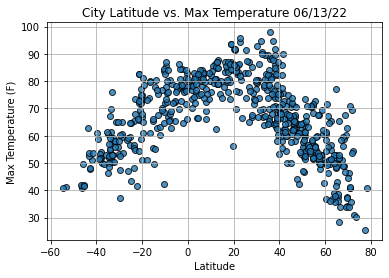

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

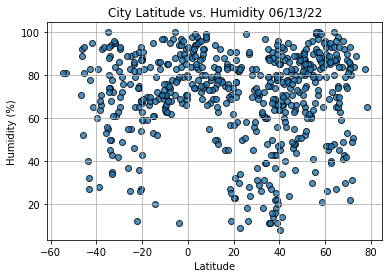

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

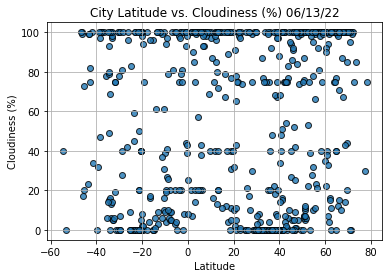

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

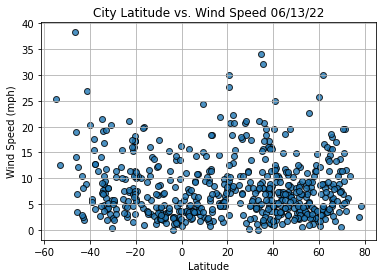

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Cherskiy,RU,2022-06-14 01:14:39,68.7500,161.3000,67.44,30,14,8.84
2,Aksarayskiy,RU,2022-06-14 01:14:40,46.7924,48.0119,67.03,36,42,8.77
4,Maryville,US,2022-06-14 01:14:39,35.7565,-83.9705,88.00,75,40,8.05
6,Kodiak,US,2022-06-14 01:14:41,57.7900,-152.4072,47.71,87,100,10.36
7,Upernavik,GL,2022-06-14 01:14:41,72.7868,-56.1549,31.10,84,75,6.15


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

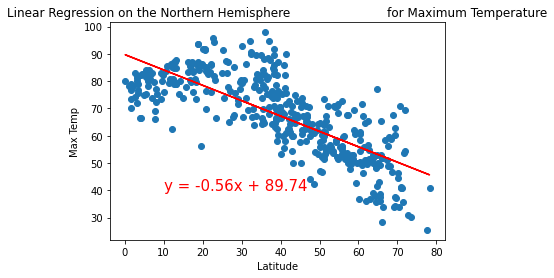

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

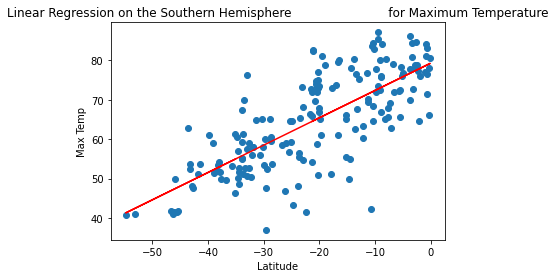

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

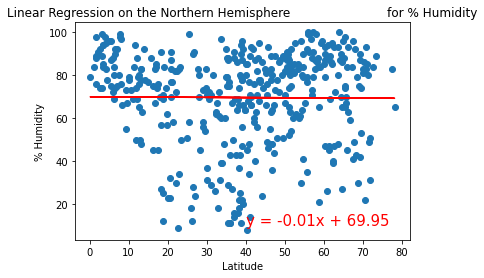

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

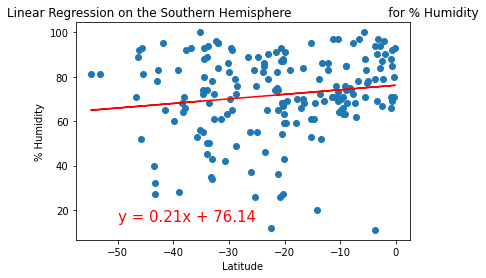

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

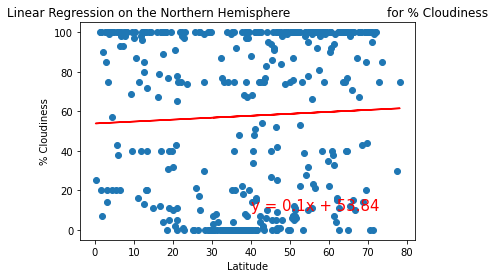

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

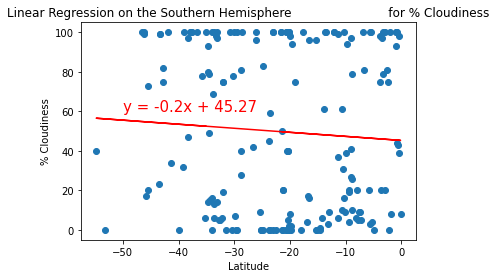

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

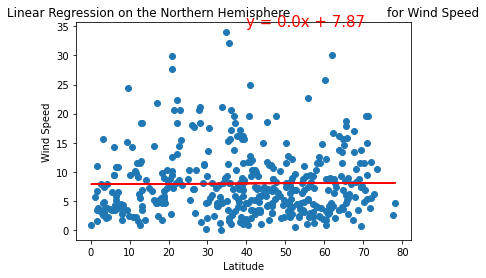

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

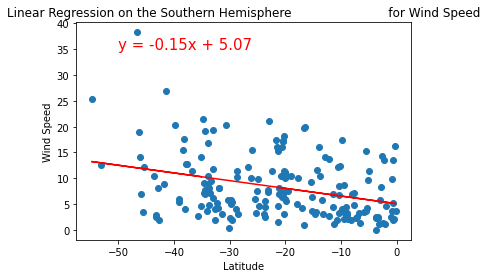

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [31]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests
# Import the API key.
from config import g_key

In [32]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Saint-Philippe,RE,2022-06-14 01:14:39,-21.3585,55.7679,65.79,75,50,15.30
1,1,Cherskiy,RU,2022-06-14 01:14:39,68.7500,161.3000,67.44,30,14,8.84
2,2,Aksarayskiy,RU,2022-06-14 01:14:40,46.7924,48.0119,67.03,36,42,8.77
3,3,Airai,TL,2022-06-14 01:14:40,-8.9266,125.4092,66.90,74,79,3.33
4,4,Maryville,US,2022-06-14 01:14:39,35.7565,-83.9705,88.00,75,40,8.05


In [33]:
city_data_df.dtypes

City_ID         int64
City           object
Country        object
Date           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
dtype: object

In [34]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)

In [35]:
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
temps = []
for temp in max_temp:
    temps.append(max(temp, 0))

In [36]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure()
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp], dissipating=False, max_intensity=300, point_radius=4) 
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [37]:
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)

In [38]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [39]:
# Heatmap of percent cloudiness
locations = city_data_df[["Lat", "Lng"]]
clouds = city_data_df["Cloudiness"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=clouds, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [40]:
# Heatmap of percent wind speed
locations = city_data_df[["Lat", "Lng"]]
wind = city_data_df["Wind Speed"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=wind, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [41]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 75
What is the maximum temperature you would like for your trip? 90


In [42]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
4,4,Maryville,US,2022-06-14 01:14:39,35.7565,-83.9705,88.00,75,40,8.05
13,13,Bombay,IN,2022-06-14 01:14:00,19.0144,72.8479,84.18,84,40,4.61
15,15,Avenal,US,2022-06-14 01:14:43,36.0041,-120.1290,82.17,11,0,20.65
18,18,Banjarmasin,ID,2022-06-14 01:14:44,-3.3244,114.5910,80.74,90,100,2.39
24,24,Sola,VU,2022-06-14 01:14:45,-13.8833,167.5500,80.33,79,61,16.08
25,25,Lamu,KE,2022-06-14 01:14:46,-2.2717,40.9020,77.22,79,0,13.47
29,29,Kloulklubed,PW,2022-06-14 01:14:47,7.0419,134.2556,82.90,75,93,10.87
32,32,Limoeiro Do Ajuru,BR,2022-06-14 01:14:47,-1.8953,-49.3806,75.94,90,8,4.59
36,36,Kapaa,US,2022-06-14 01:14:48,22.0752,-159.3190,85.98,72,75,18.41
38,38,Atuona,PF,2022-06-14 01:11:47,-9.8000,-139.0333,77.72,70,94,17.47


In [43]:
preferred_cities_df.count()

City_ID       181
City          181
Country       181
Date          181
Lat           181
Lng           181
Max Temp      181
Humidity      181
Cloudiness    181
Wind Speed    181
dtype: int64

In [44]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
4,Maryville,US,88.00,35.7565,-83.9705,
13,Bombay,IN,84.18,19.0144,72.8479,
15,Avenal,US,82.17,36.0041,-120.1290,
18,Banjarmasin,ID,80.74,-3.3244,114.5910,
24,Sola,VU,80.33,-13.8833,167.5500,
25,Lamu,KE,77.22,-2.2717,40.9020,
29,Kloulklubed,PW,82.90,7.0419,134.2556,
32,Limoeiro Do Ajuru,BR,75.94,-1.8953,-49.3806,
36,Kapaa,US,85.98,22.0752,-159.3190,
38,Atuona,PF,77.72,-9.8000,-139.0333,


In [45]:
# Set parameters to search for a hotel.
params = {
    "radius": 5000,
    "type": "lodging",
    "key": g_key
}

In [46]:
# Iterate through the DataFrame.
for index, row in hotel_df.iterrows():
    # Get the latitude and longitude.
    lat = row["Lat"]
    lng = row["Lng"]

    # Add the latitude and longitude to location key for the params dictionary.
    params["location"] = f"{lat},{lng}"

    # Use the search term: "lodging" and our latitude and longitude.
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    # Make request and get the JSON data from the search.
    hotels = requests.get(base_url, params=params).json()
    # Grab the first hotel from the results and store the name.
try:
    hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
except (IndexError):
    print("Hotel not found... skipping.")
    
hotel_df

,City,Country,Max Temp,Lat,Lng,Hotel Name
4,Maryville,US,88.00,35.7565,-83.9705,
13,Bombay,IN,84.18,19.0144,72.8479,
15,Avenal,US,82.17,36.0041,-120.1290,
18,Banjarmasin,ID,80.74,-3.3244,114.5910,
24,Sola,VU,80.33,-13.8833,167.5500,
...,...,...,...,...,...,...
570,Aden,YE,86.99,12.7794,45.0367,
572,Lahij,YE,84.70,13.1667,44.5833,
575,Tomatlan,MX,85.96,19.9333,-105.2500,
579,Atambua,ID,80.11,-9.1061,124.8925,


In [48]:
# Add a heatmap of temperature for the vacation spots and marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,
             dissipating=False, max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [49]:
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
</dl>
"""

# Store the DataFrame Row.
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]

In [50]:
# Add a heatmap of temperature for the vacation spots and a pop-up marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,dissipating=False,
             max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))